##### BUILDING THE MODEL-BASED COLLABORATIVE FILTERING USING REGRESSION ALGORITHMS TO PREDICT THE MISSING RATINGS
##### IN THE HYPOTHETICAL DATA CONSIDERING 8 USERS AND 3 ITEMS.

In [1]:
##### IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#### DEFINING THE HYPOTHETICAL RATING MATRIX
df = pd.DataFrame([[3.0, 2.0, 1.0], [np.nan, 1,2], [1,1,4], [3, np.nan, 2], [4,2,1], [1,2,3], [2,3,1], [3,2, np.nan]])
df

,0,1,2
0,3.0,2.0,1.0
1,NaN,1.0,2.0
2,1.0,1.0,4.0
3,3.0,NaN,2.0
4,4.0,2.0,1.0
5,1.0,2.0,3.0
6,2.0,3.0,1.0
7,3.0,2.0,NaN


In [3]:
#### INORDER TO BUILD THE MBCF WE NEED TO CONSIDER INITIALLY ONLY THOSE ROWS WHICH ARE COMPLETE
df_full = df.dropna()
df_full


,0,1,2
0,3.0,2.0,1.0
2,1.0,1.0,4.0
4,4.0,2.0,1.0
5,1.0,2.0,3.0
6,2.0,3.0,1.0


##### 1. MBCF USING LINEAR REGRESSION MODEL USING OLS METHOD

In [4]:
#### BUILDING MODEL m_1 FOR ESTIMATING THE RATINGS FOR ITEM 1
X = df_full.iloc[:, 1:3]
y = df_full[0]

X = sm.add_constant(X)
m_1 = sm.OLS(y, X).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     12.22
Date:                Thu, 20 Feb 2025   Prob (F-statistic):             0.0756
Time:                        20:50:06   Log-Likelihood:                -1.4087
No. Observations:                   5   AIC:                             8.817
Df Residuals:                       2   BIC:                             7.646
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6286      1.550      4.922      0.039       0.960      14.298
1             -1.4286      0.542     -2.635      0.119      -3.761       0.904
2             -1.2857      0.271     -4.743      0.042      -2.452      -0.119
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.389
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.096
Skew:                           0.132   Prob(JB):                        0.953
Kurtosis:                       2.376   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#### BUILDING MODEL m_2 FOR ESTIMATING THE RATINGS FOR ITEM 2
X = df_full.iloc[:, [0,2]]
y = df_full[1]

X = sm.add_constant(X)
m_2 = sm.OLS(y, X).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     9.222
Date:                Thu, 20 Feb 2025   Prob (F-statistic):             0.0978
Time:                        20:50:06   Log-Likelihood:                 1.0074
No. Observations:                   5   AIC:                             3.985
Df Residuals:                       2   BIC:                             2.813
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7609      0.807      5.902      0.028       1.290       8.232
0             -0.5435      0.206     -2.635      0.119      -1.431       0.344
2             -0.7826      0.190     -4.116      0.054      -1.601       0.035
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.780
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.705
Skew:                          -0.820   Prob(JB):                        0.703
Kurtosis:                       2.167   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#### BUILDING MODEL m_3 FOR ESTIMATING THE RATINGS FOR ITEM 3
X = df_full.iloc[:, [0,1]]
y = df_full[2]

X = sm.add_constant(X)
m_3 = sm.OLS(y, X).fit()
m_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      2   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     27.00
Date:                Thu, 20 Feb 2025   Prob (F-statistic):             0.0357
Time:                        20:50:06   Log-Likelihood:               0.060810
No. Observations:                   5   AIC:                             5.878
Df Residuals:                       2   BIC:                             4.707
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8571      0.589      9.944      0.010       3.323       8.391
0             -0.7143      0.151     -4.743      0.042      -1.362      -0.066
1             -1.1429      0.278     -4.116      0.054      -2.338       0.052
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.071
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.544
Skew:                          -0.768   Prob(JB):                        0.762
Kurtosis:                       2.500   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
### NOW, FOR PREDICTING r_hat(2,1), THAT IS, RATING BY ROW 1 FOR COLUMN 0 WE USE MODEL m_1
r_2_1 = m_1.predict(np.array([[1.0, 1.0, 2.0]]))
r_2_1


array([3.62857143])

###### THEREFORE, WE RECOMMEND ITEM 1 TO USER 2 DUE TO ITS GOOD RATING

In [8]:
### NOW, FOR PREDICTING r_hat(4,2), THAT IS, RATING BY ROW 3 FOR COLUMN 1 WE USE MODEL m_2
r_4_2 = m_2.predict(np.array([[1.0, 3.0, 2.0]]))
r_4_2


array([1.56521739])

###### THEREFORE, WE DO NOT RECOMMEND ITEM 2 TO USER 4 DUE TO ITS POOR RATING

In [9]:
### NOW, FOR PREDICTING r_hat(8,3), THAT IS, RATING BY ROW 7 FOR COLUMN 3 WE USE MODEL m_3
r_8_3 = m_3.predict(np.array([[1.0, 3.0, 2.0]]))
r_8_3


array([1.42857143])

###### THEREFORE, WE DO NOT RECOMMEND ITEM 3 TO USER 8 DUE TO ITS POOR RATING


#### 2. MBCF USING REGRESSION TREE MODEL

|--- feature_1 <= 2.00
|   |--- feature_0 <= 2.50
|   |   |--- value: [3.50]
|   |--- feature_0 >  2.50
|   |   |--- value: [2.00]
|--- feature_1 >  2.00
|   |--- value: [1.00]



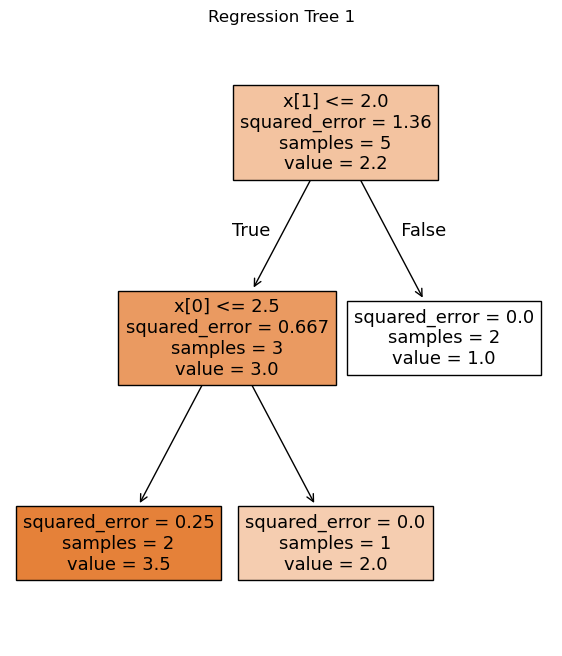

In [10]:
#### BUILDING THE DECISION TREE REGRESSOR MODEL dtr_1 FOR ESTIMATING THE RATINGS FOR ITEM 1
X = df_full.iloc[:, 1:3]
y = df_full[0]

dtr = DecisionTreeRegressor()
dtr_1 = dtr.fit(X, y)

#### PLOTTING THE REGRESSION TREE
fig = plt.figure(figsize = (7,8))
dtr_1_plot = plot_tree(dtr, filled = True)
plt.title("Regression Tree 1")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(dtr)
print(text_representation)

|--- feature_1 <= 3.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 2.00
|   |   |   |--- value: [3.00]
|   |   |--- feature_1 >  2.00
|   |   |   |--- value: [2.00]
|   |--- feature_0 >  2.50
|   |   |--- value: [2.00]
|--- feature_1 >  3.50
|   |--- value: [1.00]



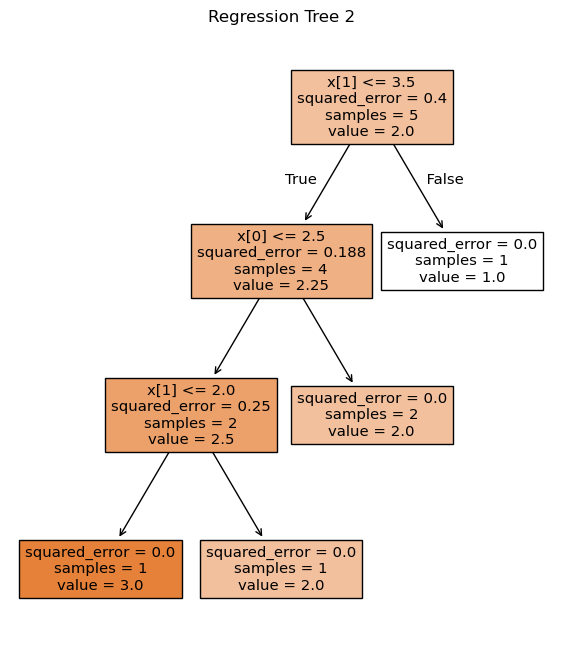

In [11]:
#### BUILDING THE DECISION TREE REGRESSOR MODEL dtr_2 FOR ESTIMATING THE RATINGS FOR ITEM 2
X = df_full.iloc[:, [0,2]]
y = df_full[1]

dtr = DecisionTreeRegressor()
dtr_2 = dtr.fit(X, y)

#### PLOTTING THE REGRESSION TREE
fig = plt.figure(figsize = (7,8))
dtr_2_plot = plot_tree(dtr, filled = True)
plt.title("Regression Tree 2")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(dtr)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_1 <= 1.50
|   |   |--- value: [4.00]
|   |--- feature_1 >  1.50
|   |   |--- value: [3.00]
|--- feature_0 >  1.50
|   |--- value: [1.00]



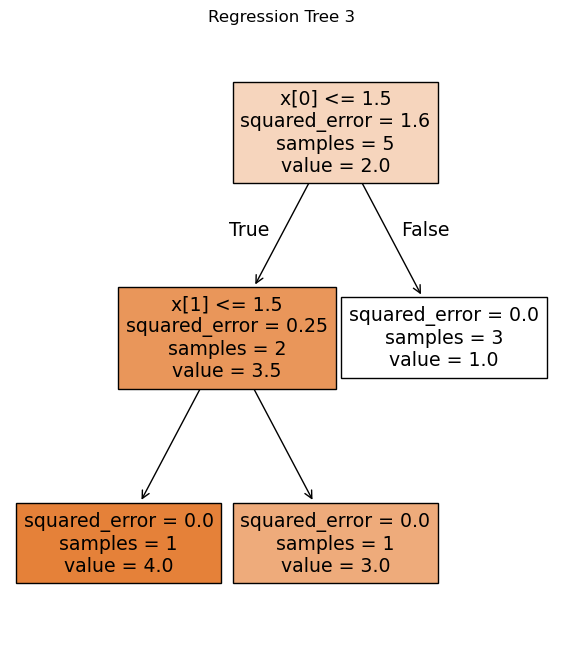

In [12]:
#### BUILDING THE DECISION TREE REGRESSOR MODEL dtr_3 FOR ESTIMATING THE RATINGS FOR ITEM 3
X = df_full.iloc[:, [0,1]]
y = df_full[2]

dtr = DecisionTreeRegressor()
dtr_3 = dtr.fit(X, y)

#### PLOTTING THE REGRESSION TREE
fig = plt.figure(figsize = (7,8))
dtr_3_plot = plot_tree(dtr, filled = True)
plt.title("Regression Tree 3")


#### FETCHING THE TEXT INFORMATION REGARDING THE SELECTED NODES
text_representation = export_text(dtr)
print(text_representation)

In [13]:
### NOW, FOR PREDICTING r_hat(2,1), THAT IS, RATING BY ROW 1 FOR COLUMN 0 WE USE MODEL dtr_1
r_2_1 = dtr_1.predict(np.array([[1.0, 2.0]]))
r_2_1

array([3.5])

###### THEREFORE, WE RECOMMEND ITEM 1 TO USER 2 DUE TO ITS GOOD RATING.

In [14]:
### NOW, FOR PREDICTING r_hat(4,2), THAT IS, RATING BY ROW 3 FOR COLUMN 1 WE USE MODEL dtr_2
r_4_2 = dtr_2.predict(np.array([[3.0, 2.0]]))
r_4_2


array([2.])

###### THEREFORE, WE DO NOT RECOMMEND ITEM 2 TO USER 4 DUE TO ITS POOR RATING.

In [15]:
### NOW, FOR PREDICTING r_hat(8,3), THAT IS, RATING BY ROW 7 FOR COLUMN 3 WE USE MODEL dtr_3
r_8_3 = dtr_3.predict(np.array([[3.0, 2.0]]))
r_8_3

array([1.])

###### THEREFORE, WE DO NOT RECOMMEND ITEM 3 TO USER 8 DUE TO ITS POOR RATING.

In [16]:
#### OUTLINE PREDICTION WITH TEST OBJECT -1 USING dtr_3
t_1_pred = dtr_3.predict(np.array([[1.0, 2.0]]))
t_1_pred                                          

array([3.])

###### THEREFORE, WE RECOMMEND ITEM 3 TO TEST USER 1 DUE TO ITS GOOD RATING.

In [17]:
#### OUTLINE PREDICTION WITH TEST OBJECT -2 USING dtr_3
t_2_pred = dtr_3.predict(np.array([[3.0, 3.0]]))
t_2_pred  

array([1.])

###### THEREFORE, WE DO NOT RECOMMEND ITEM 3 TO TEST USER 2 DUE TO ITS POOR RATING.